_ASSIGNMENT-2 PRATHAM SUNKAD ME21B145_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

**Defining functions**

In [2]:
# Function to read the dataframe and return a numpy array of the data and the target
def read_data(filename):
    data = pd.read_csv(filename, header=None)
    data_array = data.iloc[:, :-1].values.T
    y_array = data.iloc[:, -1].values
    y_array = y_array.reshape(y_array.shape[0],1)
    return data_array, y_array

In [3]:
# function to read the dataframe and add one more feature for bias. Add 1 to the last column of the dataset
def read_data_bias(filename):
    data = pd.read_csv(filename, header=None)
    data.insert(100, 'bias', 1)
    data_array = data.iloc[:, :-1].values.T
    y_array = data.iloc[:, -1].values
    y_array = y_array.reshape(y_array.shape[0],1)
    return data_array, y_array

In [4]:
#Using least squares equation to find the best "w" fitting the data
def linear_reg(X, Y):
    w_ml = np.linalg.inv(X @ X.T) @ X @ Y
    return w_ml

In [5]:
# Calculating error using the formula (Y - w^T * X)^2
def cal_error(X, Y, w):
    error_matrix = Y.T - w.T @ X
    error = 0
    for i in range(error_matrix.shape[1]):
        error += error_matrix[0][i] ** 2
        
    return error

In [6]:
# Intializing the weights(w) randomly and using gradient descent over Iterations to find the new weights
def grad_desc(X, Y, lr, iterations, w_ml):
    
    w = np.random.normal(0, 0.1, (X.shape[0],1))
    # w = np.zeros((X.shape[0],1))
    mod_array = []
    iteration_array = []
    for i in range(iterations):
        mod_array.append(np.linalg.norm(w - w_ml))
        iteration_array.append(i)
        grad = 2*(X @ X.T @ w - X @ Y)
        w = w - (lr* grad)
        
        
    return w, mod_array, iteration_array

In [13]:
def grad_desc_lr(X, Y, lr, iterations, w_ml):
    
    w = np.random.normal(0, 0.1, (X.shape[0],1))
    # w = np.zeros((X.shape[0],1))
    mod_array = []
    iteration_array = []
    for i in range(iterations):
        mod_array.append(np.linalg.norm(w - w_ml))
        iteration_array.append(i)
        grad = 2*(X @ X.T @ w - X @ Y)
        w = w - (lr/(i+1)* grad)
        
        
    return w, mod_array, iteration_array

In [7]:
def stoch_grad(X, Y, lr, iterations, batch_size, w_ml):
    # samples = np.random.randint(0, X.shape[1], size = batch_size)
    # X_batch = X[:, samples]
    # Y_batch = Y[samples]
    w = np.random.normal(0, 0.1, (X.shape[0],1))
    # w = np.zeros((X.shape[0],1))
    mod_array = []
    iteration_array = []
    for i in range(iterations):
        samples = np.random.randint(0, X.shape[1], size = batch_size)
        X_batch = X[:, samples]
        Y_batch = Y[samples]
        mod_array.append(np.linalg.norm(w - w_ml))
        iteration_array.append(i)
        grad = 2*(X_batch @ X_batch.T @ w - X_batch @ Y_batch)
        w = w - (lr * grad)
    
    return w, mod_array, iteration_array

In [69]:
def ridge_reg(X, Y, lr, iterations, lamda):
    w = np.random.normal(0, 0.1, (X.shape[0],1))
    # w = np.zeros((X.shape[0],1))
    mod_array = []
    iteration_array = []
    for i in range(iterations):
        mod_array.append(cal_error(X, Y, w))
        iteration_array.append(i)
        grad = 2*(X @ X.T @ w - X @ Y) + lamda*w
        w = w - (lr * grad)
        
    return w, mod_array, iteration_array

In [9]:
def ridge_analytical(X, Y, lamda):
    w = np.linalg.inv(X @ X.T + lamda * np.eye(X.shape[0])) @ X @ Y
    return w

In [10]:
def kfold_val(X, Y, k, lr, iterations, function_name, lamda):
    n = X.shape[1]
    fold_size = n//k
    error = 0
    for i in range(k):
        X_train = np.concatenate((X[:, :i*fold_size], X[:, (i+1)*fold_size:]), axis = 1)
        Y_train = np.concatenate((Y[:i*fold_size], Y[(i+1)*fold_size:]), axis = 0)
        X_val = X[:, i*fold_size:(i+1)*fold_size]
        Y_val = Y[i*fold_size:(i+1)*fold_size]
        w_temp, mod_array_temp, iteration_array_temp = function_name(X_train, Y_train, lr, iterations, lamda)
        error += cal_error(X_val, Y_val, w_temp)
    
    return error/k

In [11]:
def normalize_train(X):
    mean = np.mean(X, axis = 1).reshape(X.shape[0], 1)
    std = np.std(X, axis = 1).reshape(X.shape[0], 1)
    X = (X - mean)/std
    return X, mean, std

In [12]:
def normalize_test(X, mean, std):
    X = (X - mean)/std
    return X

**Finding W_ml**

In [14]:
filename = 'A2Q2Data_train.csv'

Loaded the dataset with one extra feature for the bias, Incase the best "w" does not pass from the origin

In [15]:
dataset_bias, y_bias = read_data_bias(filename)

In [16]:
dataset_bias.shape, y_bias.shape

((101, 10000), (10000, 1))

In [17]:
dataset_bias, y_bias

(array([[0.58351 , 0.86622 , 0.39142 , ..., 0.89209 , 0.70381 , 0.36578 ],
        [0.37939 , 0.45135 , 0.91995 , ..., 0.99753 , 0.42294 , 0.028173],
        [0.83975 , 0.93479 , 0.13873 , ..., 0.88043 , 0.25923 , 0.021793],
        ...,
        [0.84948 , 0.41419 , 0.29479 , ..., 0.33115 , 0.4981  , 0.015329],
        [0.92369 , 0.83023 , 0.5428  , ..., 0.92875 , 0.060471, 0.99026 ],
        [1.      , 1.      , 1.      , ..., 1.      , 1.      , 1.      ]]),
 array([[1.9741],
        [2.3354],
        [2.2053],
        ...,
        [2.0964],
        [1.8405],
        [2.7624]]))

In [18]:
w_ml_bias = linear_reg(dataset_bias, y_bias)

In [19]:
w_ml_bias

array([[-8.22857432e-03],
       [-1.40735081e-02],
       [-4.02942767e-03],
       [ 2.31220046e-03],
       [ 1.88157124e-01],
       [ 2.23820069e-03],
       [ 9.11822774e-03],
       [ 1.79432430e-01],
       [ 3.32884968e-03],
       [ 4.99250666e-01],
       [ 7.98628410e-03],
       [ 3.94689676e-03],
       [ 1.38609783e-02],
       [ 3.59213519e-03],
       [ 8.95875251e-03],
       [-1.39801208e-03],
       [ 3.00560684e-03],
       [ 8.39456862e-04],
       [-9.80758689e-03],
       [-2.86553616e-03],
       [-1.21436606e-02],
       [-1.05889398e-02],
       [ 7.54500426e-03],
       [-1.04598177e-02],
       [ 5.75759844e-03],
       [-5.05271340e-03],
       [-3.41199334e-03],
       [ 7.73777160e-03],
       [ 1.16039534e-02],
       [-7.23226013e-03],
       [-8.98924102e-03],
       [ 6.16057636e-04],
       [ 4.57696298e-03],
       [ 5.58297065e-03],
       [-1.38113067e-02],
       [ 7.16306770e-04],
       [ 1.28915820e-02],
       [-1.18363478e-02],
       [-2.0

In [20]:
error_bias = cal_error(dataset_bias, y_bias, w_ml_bias)
print("Error using least squares equation including the bias: ", error_bias)

Error using least squares equation including the bias:  396.85210868791546


Loading the dataset without the bias term

In [21]:
dataset, y = read_data(filename)

In [22]:
dataset.shape, y.shape

((100, 10000), (10000, 1))

In [23]:
w_ml = linear_reg(dataset, y)

In [24]:
w_ml

array([[-7.84961009e-03],
       [-1.36715320e-02],
       [-3.61656438e-03],
       [ 2.64909160e-03],
       [ 1.88551446e-01],
       [ 2.65314657e-03],
       [ 9.46531786e-03],
       [ 1.79809481e-01],
       [ 3.73757317e-03],
       [ 4.99608944e-01],
       [ 8.35836265e-03],
       [ 4.29108775e-03],
       [ 1.42141179e-02],
       [ 3.94232414e-03],
       [ 9.36795890e-03],
       [-1.12038274e-03],
       [ 3.35727500e-03],
       [ 1.16152212e-03],
       [-9.40884707e-03],
       [-2.45575476e-03],
       [-1.17409629e-02],
       [-1.01960612e-02],
       [ 7.95771321e-03],
       [-1.00574854e-02],
       [ 6.04882939e-03],
       [-4.67345192e-03],
       [-3.09091547e-03],
       [ 8.14909193e-03],
       [ 1.20264599e-02],
       [-6.82458163e-03],
       [-8.65405539e-03],
       [ 9.86273479e-04],
       [ 4.92968011e-03],
       [ 5.99772461e-03],
       [-1.34667860e-02],
       [ 1.07075729e-03],
       [ 1.32745992e-02],
       [-1.14148742e-02],
       [-2.0

In [25]:
# Calculating error using the formula (Y - w^T * X)^2
error = cal_error(dataset, y, w_ml)
print("Error using least squares equation excluding the bias: ", error)

Error using least squares equation excluding the bias:  396.86441862725104


In [26]:
# Error difference between model with excluding the bias and model with including the bias
error - error_bias

0.012309939335580111

As we can see error without using the bias is 0.0123 more, which is very less. Thus we can proceed with this w_ml itself

**Gradient Descent**

In [27]:
lr = 1e-6
iterations = 5000

In [28]:
w_grad, mod_array, iteration_array = grad_desc(dataset, y, lr, iterations, w_ml)

In [29]:
w_grad

array([[-7.79314129e-03],
       [-1.36420142e-02],
       [-3.70209614e-03],
       [ 2.67248582e-03],
       [ 1.88473452e-01],
       [ 2.69569143e-03],
       [ 9.39543115e-03],
       [ 1.79698225e-01],
       [ 3.82569007e-03],
       [ 4.99480921e-01],
       [ 8.44887988e-03],
       [ 4.29766919e-03],
       [ 1.42438171e-02],
       [ 3.88046587e-03],
       [ 9.41616169e-03],
       [-1.14307568e-03],
       [ 3.43091304e-03],
       [ 1.29950373e-03],
       [-9.31686655e-03],
       [-2.33372014e-03],
       [-1.17628885e-02],
       [-1.01746382e-02],
       [ 7.95731447e-03],
       [-1.00846975e-02],
       [ 6.03236982e-03],
       [-4.61691275e-03],
       [-3.18663038e-03],
       [ 8.12363593e-03],
       [ 1.19351252e-02],
       [-6.82569293e-03],
       [-8.63715468e-03],
       [ 9.10393377e-04],
       [ 4.97650909e-03],
       [ 5.95982844e-03],
       [-1.34630048e-02],
       [ 1.06853538e-03],
       [ 1.33429390e-02],
       [-1.13245385e-02],
       [-2.0

In [30]:
len(iteration_array), len(mod_array)

(5000, 5000)

Text(0, 0.5, '||w - w_ml||')

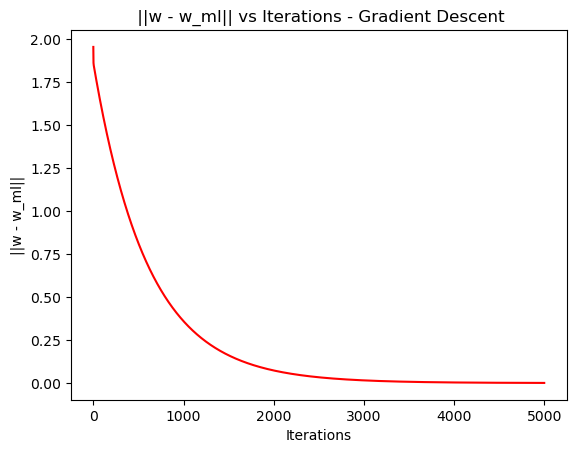

In [31]:
plt.plot(iteration_array, mod_array, c = 'red')
plt.title(" ||w - w_ml|| vs Iterations - Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("||w - w_ml||")

In [32]:
mod_array[len(mod_array) - 1]

0.0007811155898643014

In [33]:
error_grad = cal_error(dataset, y, w_grad)
print("Error using gradient descent: ", error_grad)

Error using gradient descent:  396.8648650645291


Gradient Descent with Non constant learning rate

In [34]:
w_grad_lr, mod_array_lr, iteration_array_lr= grad_desc_lr(dataset, y, lr, iterations, w_ml)

Text(0, 0.5, '||w - w_ml||')

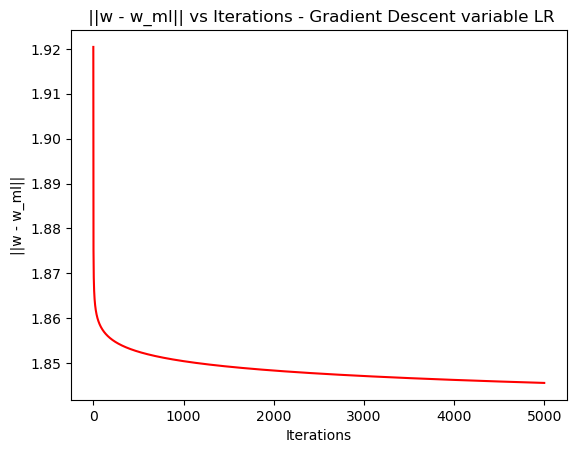

In [36]:
plt.plot(iteration_array_lr, mod_array_lr, c = 'red')
plt.title(" ||w - w_ml|| vs Iterations - Gradient Descent variable LR")
plt.xlabel("Iterations")
plt.ylabel("||w - w_ml||")

In [86]:
error_grad_lr = cal_error(dataset, y, w_grad_lr)
print("Error using gradient descent: ", error_grad_lr)

Error using gradient descent:  3169.3911501271427


**Stochastic Gradient Descent**

In [52]:
lr = 1e-4
iterations = 5000
batch_size = 100

In [53]:
w_stoch, mod_array_stoch, iteration_array_stoch = stoch_grad(dataset, y, lr, iterations, 100, w_ml)

In [54]:
len(iteration_array_stoch), len(mod_array_stoch)

(5000, 5000)

In [55]:
w_stoch

array([[-8.12176179e-03],
       [-1.78697597e-02],
       [-3.32428189e-03],
       [ 2.44285239e-03],
       [ 1.86316474e-01],
       [-2.05647261e-03],
       [ 1.09065457e-02],
       [ 1.79558565e-01],
       [ 4.53226755e-03],
       [ 4.97819544e-01],
       [ 1.16836636e-02],
       [ 9.49786134e-04],
       [ 1.38445711e-02],
       [ 6.96101243e-04],
       [ 8.59198760e-03],
       [-4.39083747e-03],
       [ 1.54092019e-03],
       [ 3.99479146e-03],
       [-5.05947752e-03],
       [-5.91636425e-03],
       [-8.27368902e-03],
       [-9.43799073e-03],
       [ 6.12702231e-03],
       [-9.26848633e-03],
       [ 5.79882701e-03],
       [-3.97633101e-03],
       [-3.26810466e-03],
       [ 6.51952417e-03],
       [ 1.43657003e-02],
       [-6.22507537e-03],
       [-8.09903725e-03],
       [-1.68208193e-03],
       [ 8.75545253e-03],
       [ 4.71616932e-03],
       [-1.17728387e-02],
       [ 4.75720401e-03],
       [ 1.40329738e-02],
       [-1.14425013e-02],
       [-2.2

Text(0, 0.5, '||w - w_ml||')

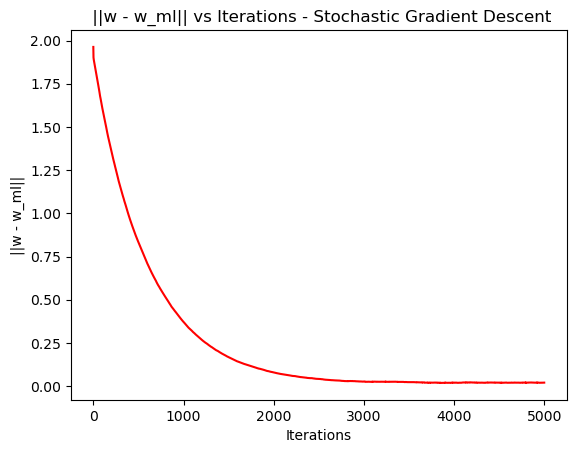

In [56]:
plt.plot(iteration_array_stoch, mod_array_stoch ,c = 'red')
plt.title(" ||w - w_ml|| vs Iterations - Stochastic Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("||w - w_ml||")

In [57]:
mod_array_stoch[len(mod_array_stoch) - 1]

0.01988557454075732

In [58]:
error_stoch = cal_error(dataset, y, w_stoch)
print("Error using stochastic gradient descent: ", error_stoch)

Error using stochastic gradient descent:  397.19139844141415


**Ridge Regression**

In [62]:
lr = 1e-6
iterations = 1000
train = 8000
val = dataset.shape[1] - train

Cross Validating for different values of lambda

In [63]:
lambda_array = [5000, 1000, 500, 250, 100, 50, 10, 5, 2, 1, 0.5 , 0.1, 0.05, 0.01, 0.005, 0.001]

In [62]:
dataset_normalized, mean, std = normalize_train(dataset)

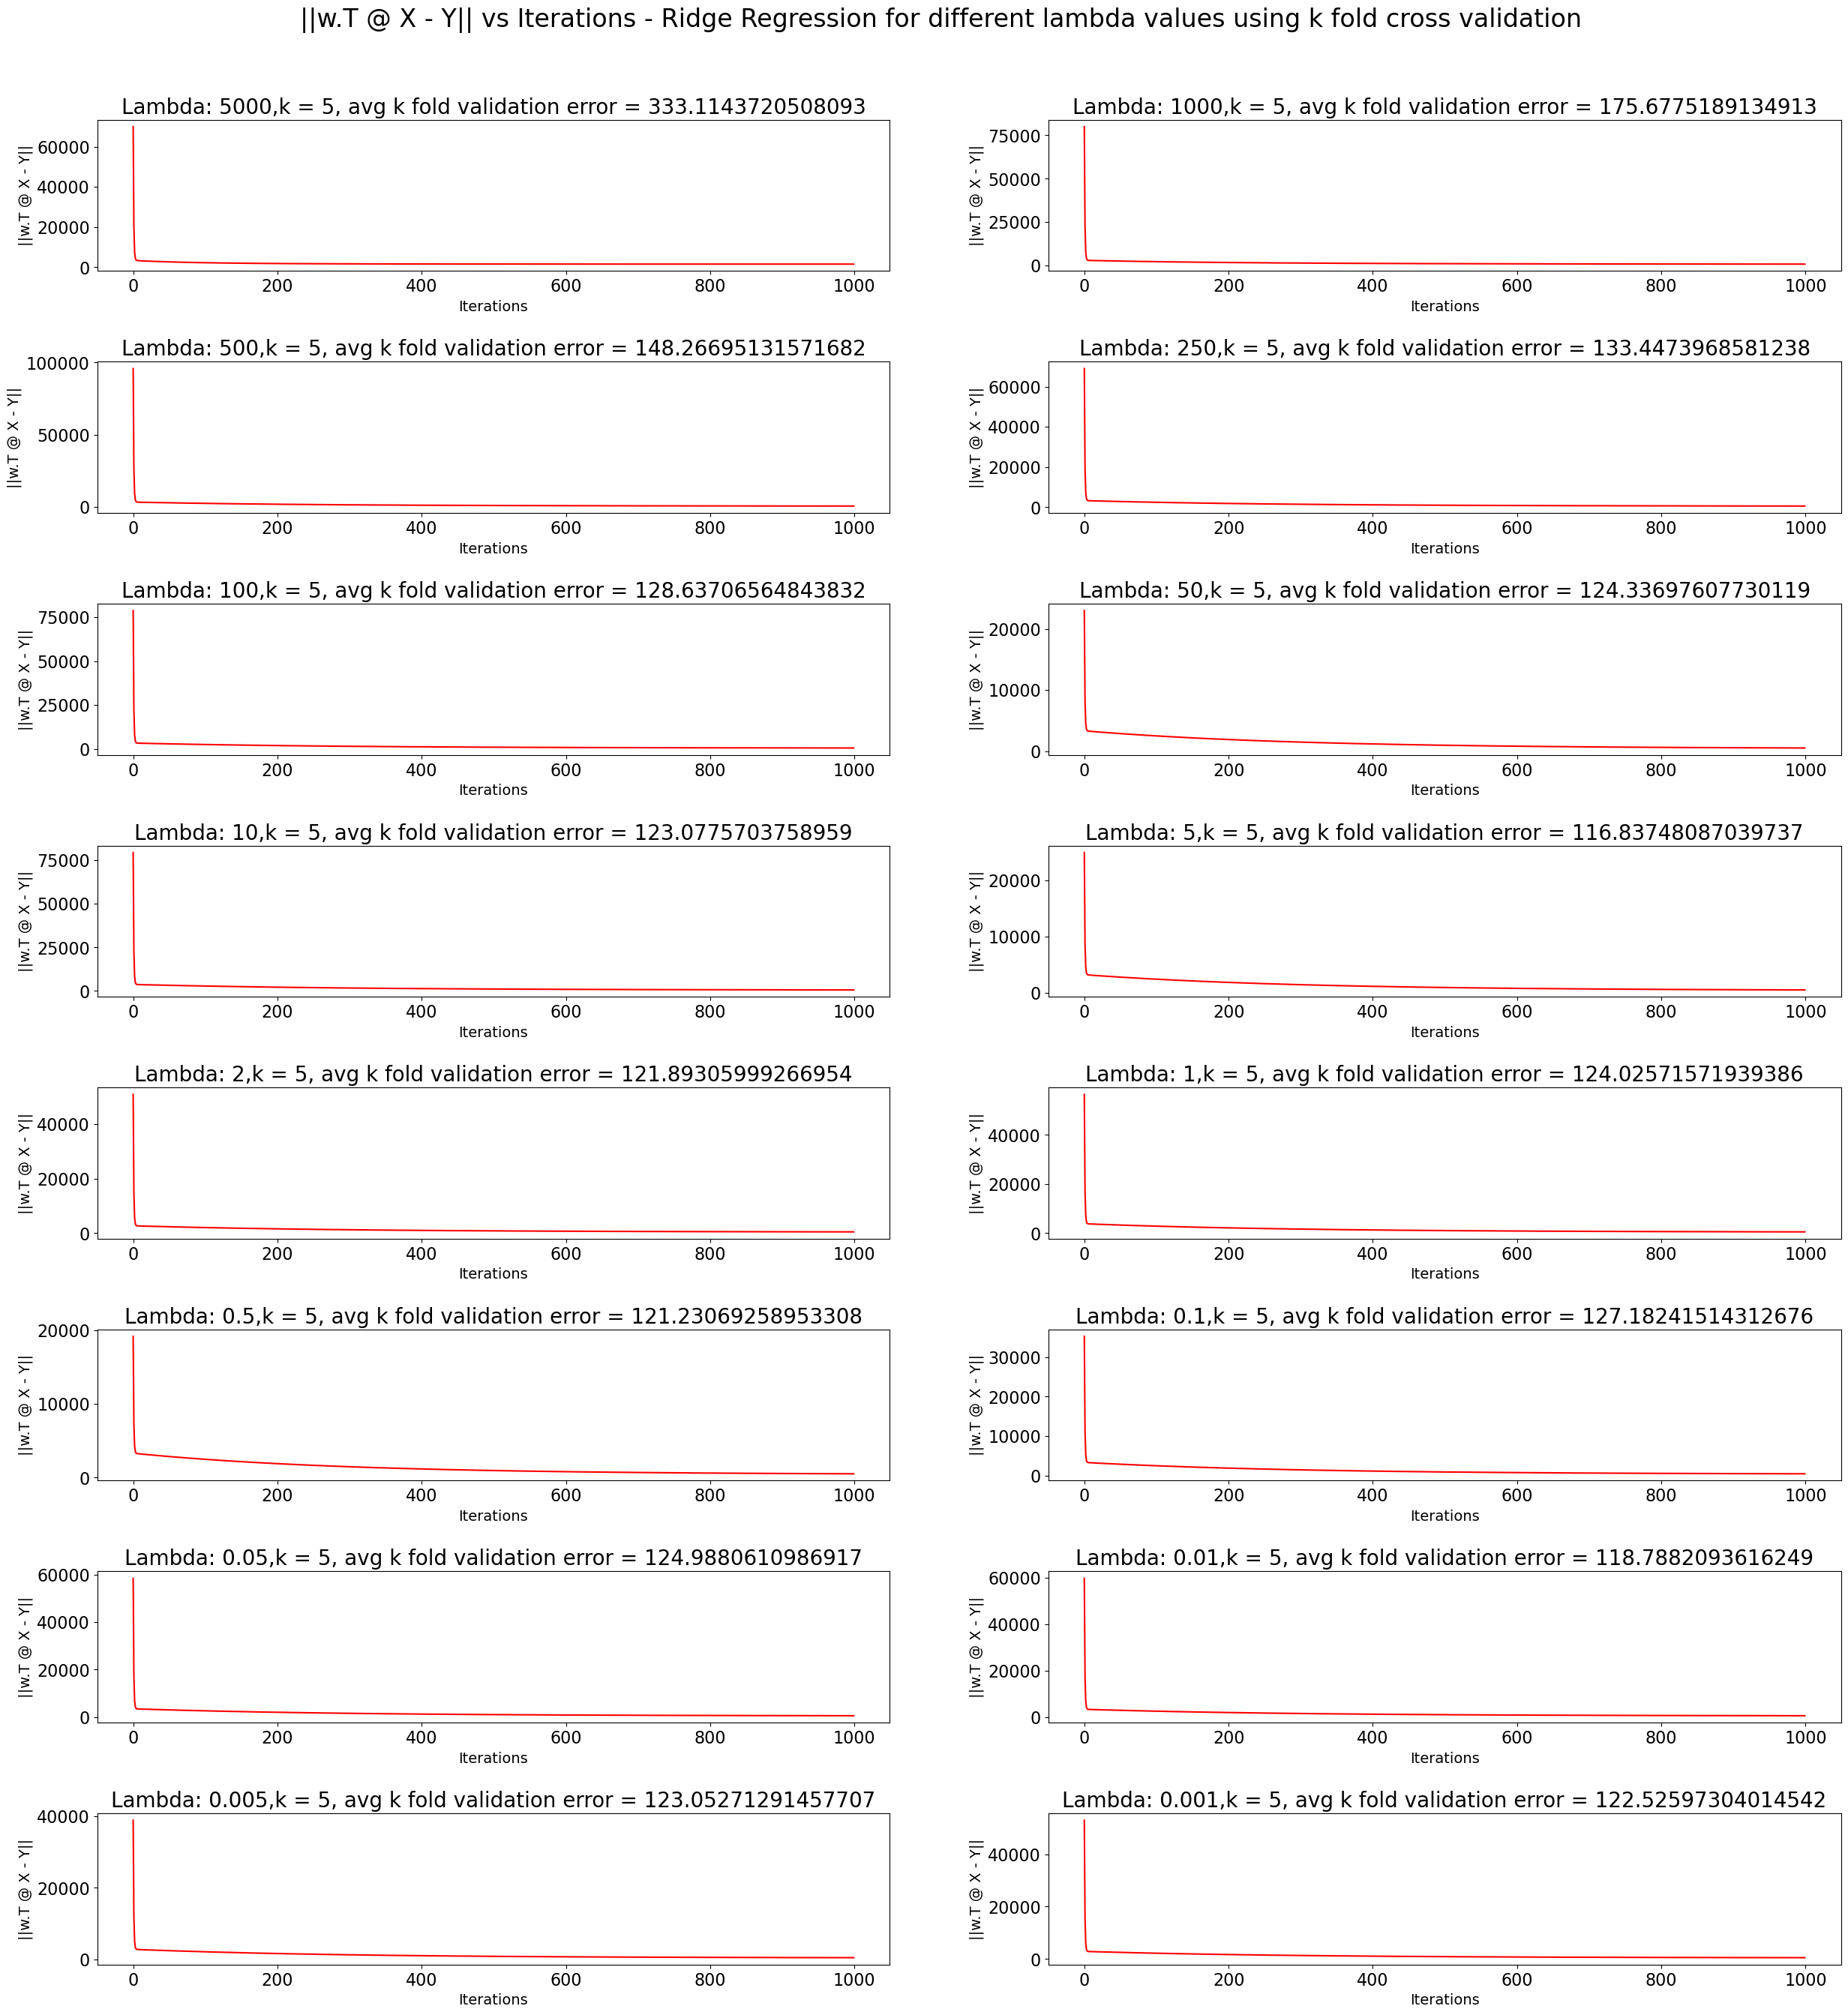

In [70]:
lambda_error = []
fig = plt.figure(figsize = (30,30))
fig.suptitle("||w.T @ X - Y|| vs Iterations - Ridge Regression for different lambda values using k fold cross validation", fontsize = 24)
for lamda in lambda_array:
    w_ridge, mod_array_ridge, iteration_array_ridge = ridge_reg(dataset, y, lr, iterations, lamda)
    plt.subplot(8, 2, lambda_array.index(lamda) + 1)
    plt.plot(iteration_array_ridge, mod_array_ridge, c = 'red')
    error_ridge = kfold_val(dataset, y, 5, lr, iterations, ridge_reg, lamda)
    plt.title("Lambda: " + str(lamda) + ",k = 5, avg k fold validation error = " + str(error_ridge), fontsize = 20)
    plt.xlabel("Iterations", fontsize = 14)
    plt.ylabel("||w.T @ X - Y||", fontsize = 14)
    plt.tick_params(axis='both', which='major', labelsize=16)  # Increase the tick label size here
    lambda_error.append(error_ridge)
plt.subplots_adjust(top=0.93, hspace=0.6, wspace=0.2)  # Adjust hspace and wspace here
plt.show()

To check which value of lambda is the best, we have run till an iteration such that non of the models have converged and see which has the lowest l2 error

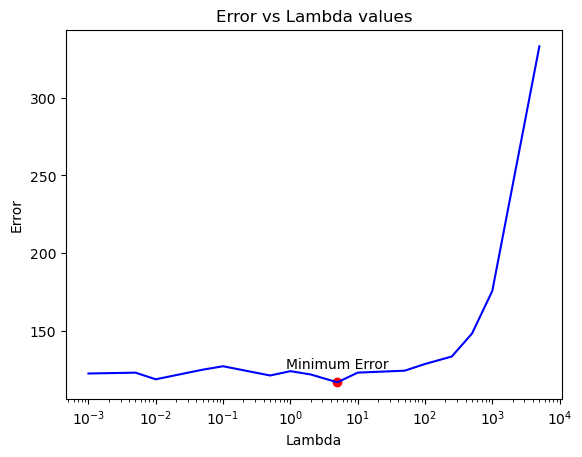

In [85]:
plt.plot(lambda_array, lambda_error, c = 'blue')
plt.xscale('log')
plt.title("Error vs Lambda values")
plt.xlabel("Lambda")
plt.ylabel("Error")

# Find the index of the minimum error
min_error_idx = np.argmin(lambda_error)

# Find the corresponding lambda value
min_error_lambda = lambda_array[min_error_idx]

# Plot a point at this location
plt.scatter(min_error_lambda, lambda_error[min_error_idx], color='red')

# Add a text annotation
plt.annotate('Minimum Error', (min_error_lambda, lambda_error[min_error_idx]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

Lambda values between 2 to 5 can be considered to be the best

In [72]:
lambda_array[np.argmin(lambda_error)] #best lambda value

5

lambda = 5 has the lowest k fold cross validation error = 116.837 after 1000 iterations of gradient descent.

**Comparing w_ridge and w_ml With Test data**

In [76]:
dataset_test, y_test = read_data('A2Q2Data_test.csv')

In [117]:
lam = 5

In [118]:
w_ridge_analytical = ridge_analytical(dataset, y, lam)

In [119]:
train_error = cal_error(dataset, y, w_ridge_analytical)
train_error

396.9380521286567

In [120]:
test_error_analytical_ridge = cal_error(dataset_test, y_test, w_ridge_analytical)

In [121]:
test_error_ml = cal_error(dataset_test, y_test, w_ml)

In [122]:
print("Test error using ridge regression: ", test_error_analytical_ridge)
print("Test error using Maximum Likelihood: ", test_error_ml)

Test error using ridge regression:  184.31339018614096
Test error using Maximum Likelihood:  185.3636555848964


Therefore Ridge Regression is better!